# Creating a dataset

In [38]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

data = {
    'A': np.random.normal(loc=0.5, scale=0.1, size=100),  # Normal distribution with mean=0.5 and std=0.1
    'B': np.random.normal(loc=5, scale=1, size=100).astype(int),  # Normal distribution, mean=5, std=1, converted to integers
    'C': np.random.normal(loc=50, scale=10, size=100).astype(int),  # Normal distribution, mean=50, std=10
    'D': np.random.normal(loc=500, scale=50, size=100).astype(int),  # Normal distribution, mean=500, std=50
    'E': np.random.normal(loc=5000, scale=500, size=100).astype(int),  # Normal distribution, mean=5000, std=500
    'F': np.random.choice(['Low', 'Medium', 'High'], size=100, p=[0.3, 0.5, 0.2]),  # Ordinal variable
    'G': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], size=100),  # Nominal variable
}

df = pd.DataFrame(data)

# Ensure ordinal category is in logical order
df['F'] = pd.Categorical(df['F'], categories=['Low', 'Medium', 'High'], ordered=True)

df.head(5)


,A,B,C,D,E,F,G
0,0.549671,3,53,458,4202,Medium,Green
1,0.486174,4,55,471,4700,Medium,Green
2,0.564769,4,60,537,5002,Medium,Yellow
3,0.652303,4,60,530,5023,High,Red
4,0.476585,4,36,498,4774,Medium,Blue


# Basic Terms

## Arithmetic Mean

$$
\bar{x} = \frac{\sum x_i}{n}
$$

The arithmetic mean is shown to be the sum of all elements in the dataset, divided by the total number of elements in the dataset.

In [39]:
print(np.mean(df['A']))
print(np.mean(df['B']))
print(np.mean(df['C']))
print(np.mean(df['D']))
print(np.mean(df['E']))

0.4896153482605905
4.54
50.14
504.82
4971.51


## Median

The median is "the value that comes half-way when the data are ranked in order". When the distribtion is symetrical, the mean and median coincide. 

In [40]:
print(np.median(df['A']))
print(np.median(df['B']))
print(np.median(df['C']))
print(np.median(df['D']))
print(np.median(df['E']))

0.4873043708220287
5.0
50.5
502.0
4961.5


## Mode

"Is the most frequently occuring value in the distribution."

In [41]:
from scipy import stats

print(stats.mode(df['A']))
print(stats.mode(df['B']))
print(stats.mode(df['C']))
print(stats.mode(df['D']))
print(stats.mode(df['E']))


ModeResult(mode=np.float64(0.23802548959102554), count=np.int64(1))
ModeResult(mode=np.int64(5), count=np.int64(42))
ModeResult(mode=np.int64(55), count=np.int64(7))
ModeResult(mode=np.int64(458), count=np.int64(5))
ModeResult(mode=np.int64(4734), count=np.int64(2))


## Geometric Mean

"In some situations, the geometric mean can be useful to describe the location of a distribution. It can be calculated via the arithmetic mean of the log of the values." 

$$
\text{Geometric Mean} = \sqrt[n]{\prod_{i=1}^n x_i}
$$

The geometric mean is just looking at the growth rate between values in the dataset. It answers the question: "What single number could replace each value in the dataset so that their product remains unchanged?"

In [42]:
print(stats.gmean(df['A']))
print(stats.gmean(df['B']))
print(stats.gmean(df['C']))
print(stats.gmean(df['D']))
print(stats.gmean(df['E']))

0.4806885567207313
4.437728627532884
48.89367030174003
502.9131360335205
4943.522671827747


## Range

Simply the difference between the highest and the lowest value.

In [43]:
print(np.ptp(df['A']))
print(np.ptp(df['B']))
print(np.ptp(df['C']))
print(np.ptp(df['D']))
print(np.ptp(df['E']))

0.4472023288598682
4
71
216
2690


## Cummulative Density Function & Probability Density Function

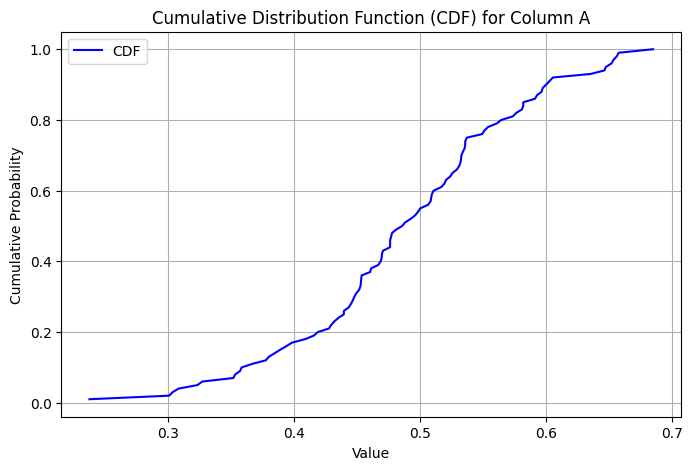

In [44]:
import matplotlib.pyplot as plt

# Extract column A
data = df['A']

# Sort the data
data_sorted = np.sort(data)

# Compute the cumulative probabilities
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, cdf, label='CDF', color='blue')
plt.title("Cumulative Distribution Function (CDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid()
plt.legend()
plt.show()

$$
F_X(x) = P(X \leq x) = \int_{-\infty}^x PDF(x) \, dx
$$

The CDF is useful in understanding percentiles, so it will be defined first. The equations for the CDF of x is shown to be the probability of value X being less than or equal to a value x. Using the chart above, you can see the CDF for the data from column A in our df. For example, let's say our value X is 0.4. That means that based on the CDF, the probablity of observing a value less than or equal to 0.4 is about 20%.

But what is the PDF?

$$
PDF(x) = \frac{d}{dx} CDF(x)
$$

The PDF and CDF are related. The CDF is the integral (area under the curve) of the PDF. And the PDF is the derivative (slope at a point) of the CDF. 

/var/folders/xs/v8vffk_j2bdc0xbbp1p9sgx00000gn/T/ipykernel_65605/2008931282.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['A'], shade=True, color="blue")


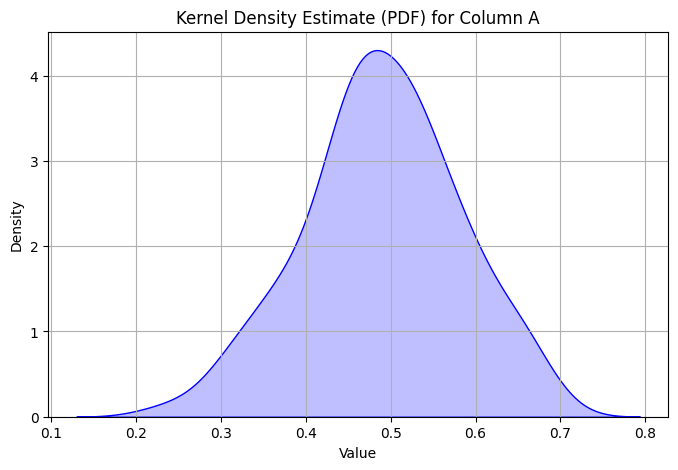

In [45]:
import seaborn as sns

# Plotting the PDF using Kernel Density Estimation (KDE)
plt.figure(figsize=(8, 5))
sns.kdeplot(df['A'], shade=True, color="blue")
plt.title("Kernel Density Estimate (PDF) for Column A")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


Now see here that the PDF of variable A can give us the CDF of the variable A as well. We cannot simply just use this chart to find the probablity of obverving a specific value in A. We need to figure out the area under the curve up to a specific point - which in turn gives us the CDF. Getting the intregral up to 0.6, for example, will return to us the area under the curve to that point, giving us the probablity of observing that outcome. 

$$
P(a <= X <= b) = \int_{b}^a PDF(x) \, dx = CDF(b) - CDF(a)
$$

So, what is the above equation saying? Here, we are no longer checking to see the probablity that a value is before or equal to a value x, we are checking to see the probablity that x falls between two values a and b.

From the perspective of the PDF, this now becomes the intregral from a to b. The area under the curve of the PDF function from points a to b. 

From the CDF, this simply becomes the value at point b from the CDF curve, minus the value at point a. The resulting value is the probablity that x falls between b and a. 

## Percentiles